In [3]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa 
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
general_path ='C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


# Audio Data Explore

Audio file = `metal.00000.wav`

In [67]:
# Importing 2 files
metal_file = 'metal.00070.wav'
classical_file = 'classical.00064.wav'

y, sr = librosa.load(f'{general_path}/genres_original/metal/{metal_file}')
y2, sr2 = librosa.load(f'{general_path}/genres_original/classical/{classical_file}')
size = len(y)

print('y:', y, '\n')
print('y shape:', size, '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the first audio
print('Check Len of Audio:', size/sr)

y: [-0.00775146 -0.02368164 -0.03305054 ...  0.00143433 -0.01153564
  0.00460815] 

y shape: 661504 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.00018140589569


## 2D Representation

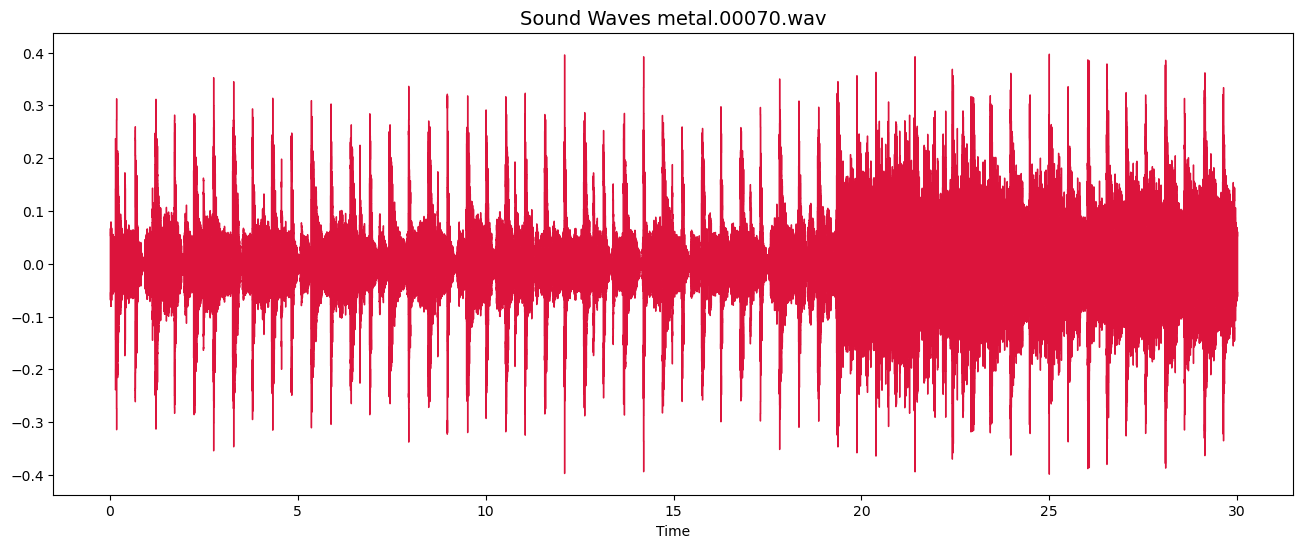

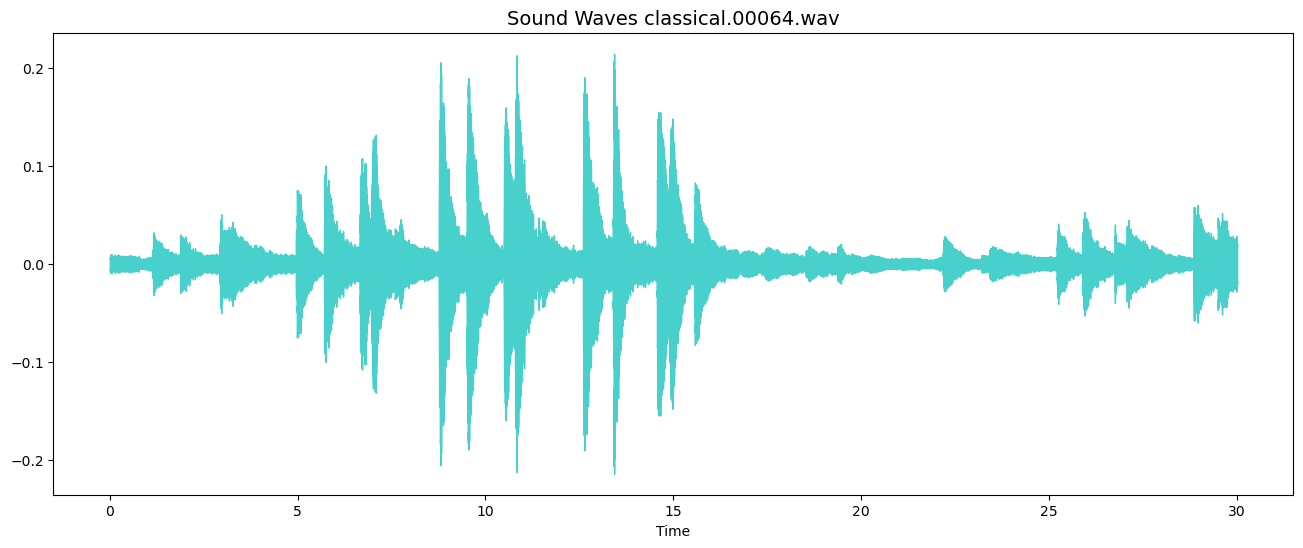

In [79]:
plt.figure(figsize = (16, 6))
audio_file, _ = librosa.effects.trim(y)
librosa.display.waveshow(y = audio_file, sr = sr, color = "crimson");
plt.title(f"Sound Waves {metal_file}", fontsize = 14);

plt.figure(figsize = (16, 6))
audio_file2, _ = librosa.effects.trim(y2)
librosa.display.waveshow(y = audio_file2, sr = sr2, color = "mediumturquoise");
plt.title(f"Sound Waves {classical_file}", fontsize = 14);


### Fourier Transform

This function transforms the domain of the input signal from time domain to frequency domain so that we can extract espectral information of the music signal. In the following representation, x-axis and y-axis are represented in log scale (y-axis in decibels, x-axis in log-frequency)?


Text(0, 0.5, 'dB')

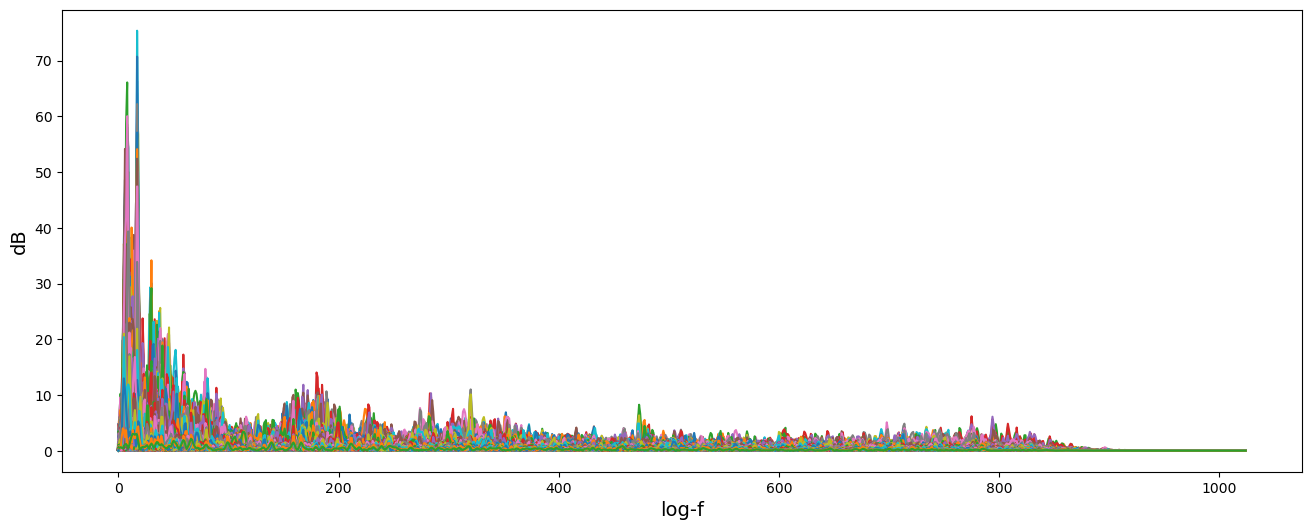

In [35]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

plt.figure(figsize = (16, 6))
plt.plot(D);
plt.xlabel('log-f', fontsize = 14)
plt.ylabel('dB', fontsize = 14)

## Spectrogram

A spectrogram consists of a 2D representacion of the frequency spectrum of the music signal along its duration time. 

Text(0.5, 1.0, 'Spectrogram of metal.00070.wav')

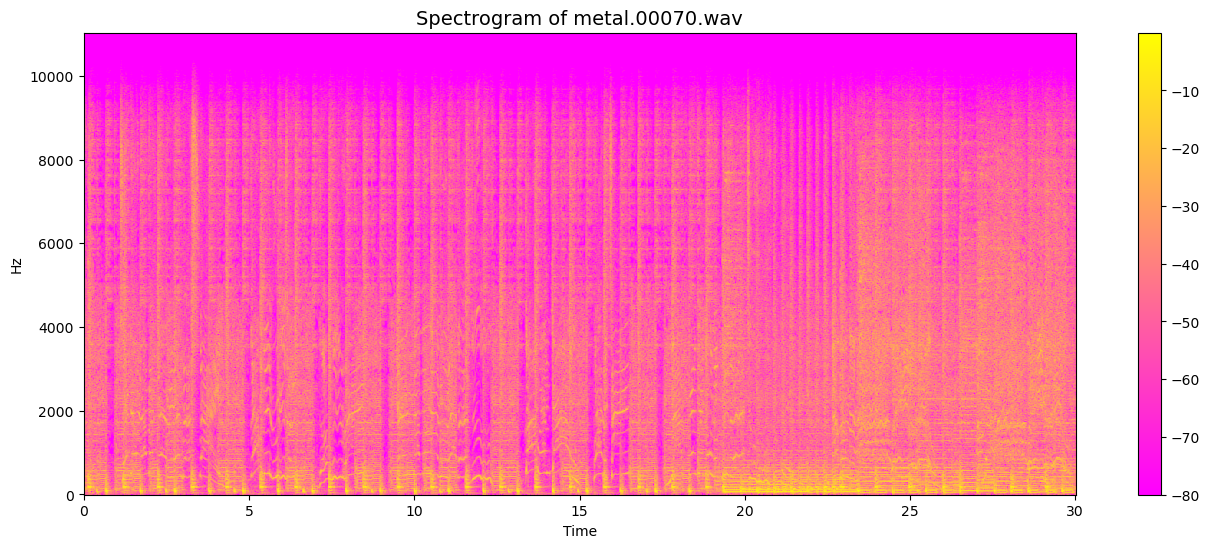

In [80]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'spring')
plt.colorbar();
plt.title(f'Spectrogram of {metal_file}', fontsize=14)

## Mel Spectrogram

Mel Spectrogram is derived from common spectrogram with a Mel Scale transformation applied on it. Mel Scale takes into consideration the human auditive capacity, which detects lower frequency distances better than high frequencies. This relation between real sound  and human perception is represented by the Mel Scale.

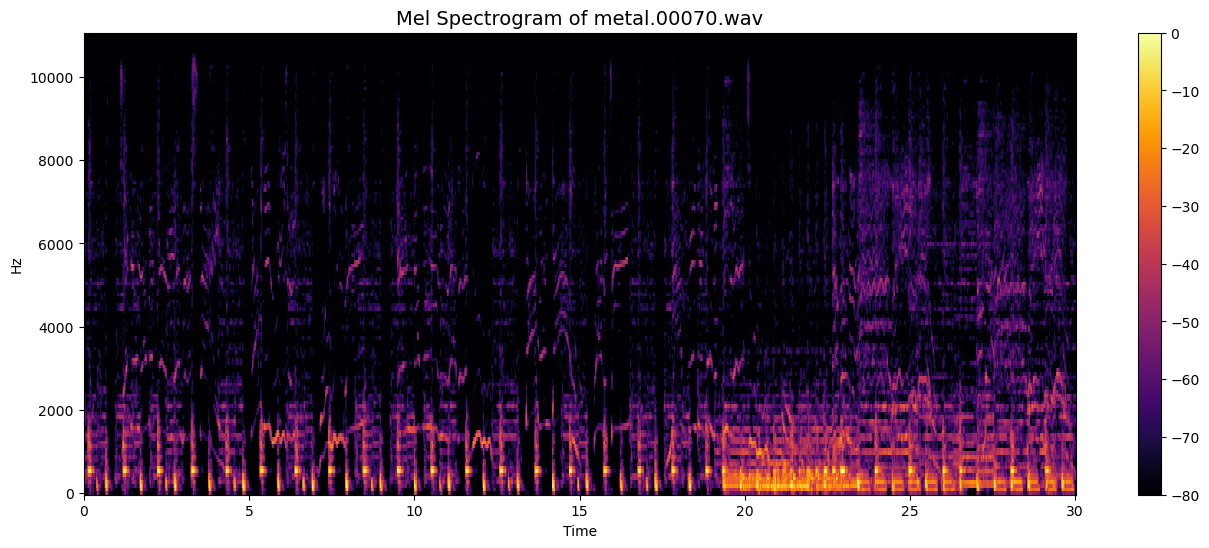

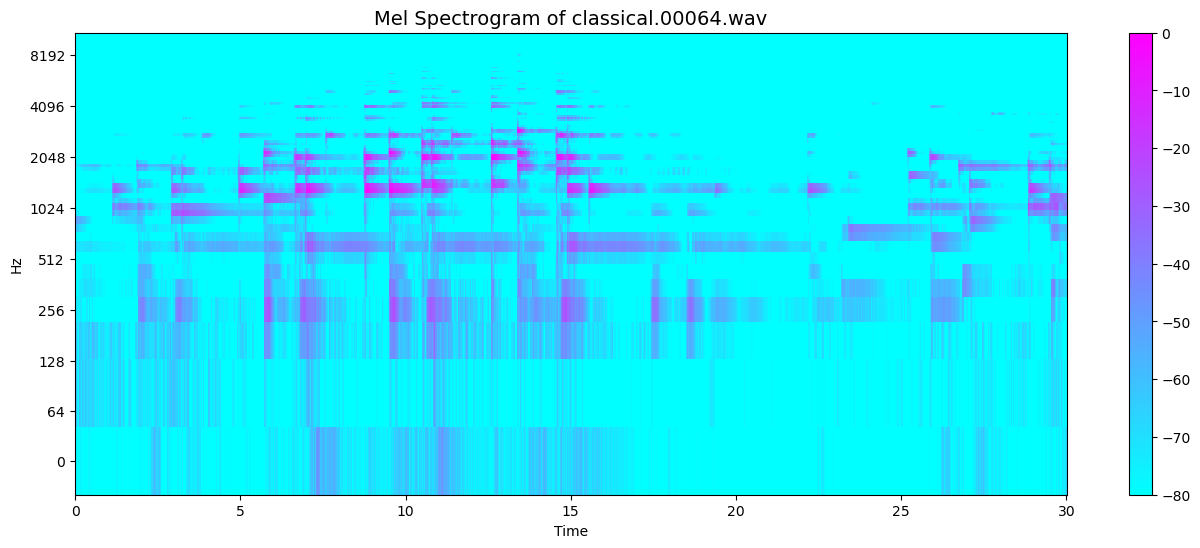

In [93]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'inferno'); #use magma
plt.colorbar();
plt.title(f"Mel Spectrogram of {metal_file}", fontsize = 14);

S2 = librosa.feature.melspectrogram(y=y2, sr=sr2)
S_DB2 = librosa.amplitude_to_db(S2, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB2, sr=sr2, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title(f"Mel Spectrogram of {classical_file}", fontsize = 14);

## Audio Features

In [103]:
features = pd.read_csv(f'{general_path}/features_30_sec.csv')
#features = features.iloc[0:, 2:]
features.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Zero Crossing Rate

It's the rate at which signal in time domain transitions from positive to negative or backwards. ZCR is an indicator of noisiness in an audio file. In the cell below, we can notice this difference between 2 audio files: one belonging to metal genre an the other one to classical. Metal genre audio has a higher ZCR than the calssical music file, due to the nature of the genre, which implements distorsion and noise is part of it.

In [78]:
# Comparition between zero_crossings in metal and classical audio file
zero_crossings_noisy = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings_noisy))
zero_crossings_clean = librosa.zero_crossings(audio_file2, pad=False)
print(sum(zero_crossings_clean))

94659
28025


(1, 1293)


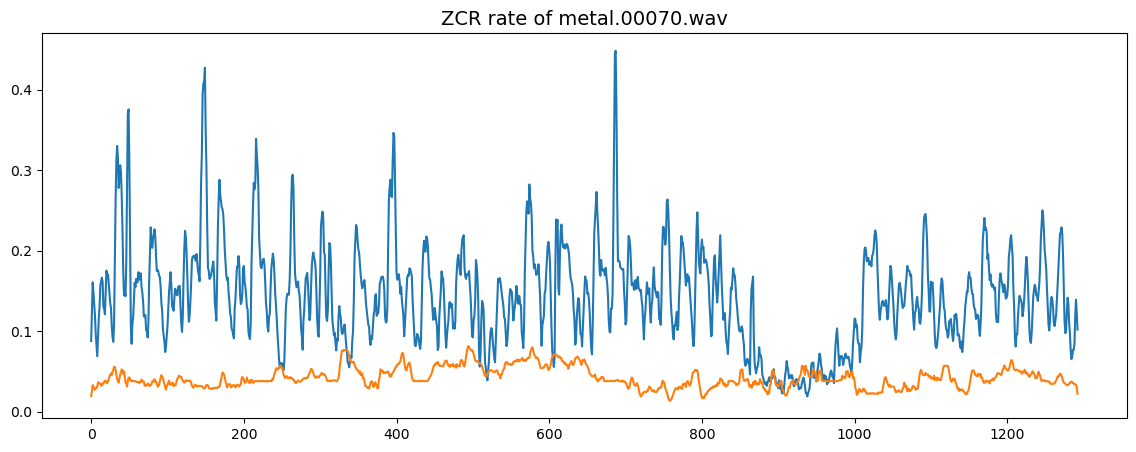

In [74]:
zcrs = librosa.feature.zero_crossing_rate(audio_file)
zcrs2 = librosa.feature.zero_crossing_rate(audio_file2)
print(zcrs.shape)

plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])
plt.plot(zcrs2[0])

plt.title(f"ZCR rate of {metal_file}", fontsize = 14);

In [119]:
zcr_df = features.iloc[0:, [12, 18, 59]]
zcr_df

,zero_crossing_rate_mean,tempo,label
0,0.083045,123.046875,blues
1,0.056040,67.999589,blues
2,0.076291,161.499023,blues
3,0.033309,63.024009,blues
4,0.101461,135.999178,blues
...,...,...,...
995,0.089227,103.359375,rock
996,0.097664,117.453835,rock
997,0.121823,129.199219,rock
998,0.048724,73.828125,rock


In [128]:
np.max(zcr_df['zero_crossing_rate_mean'])
np.min(zcr_df['zero_crossing_rate_mean'])

0.0216969831544856

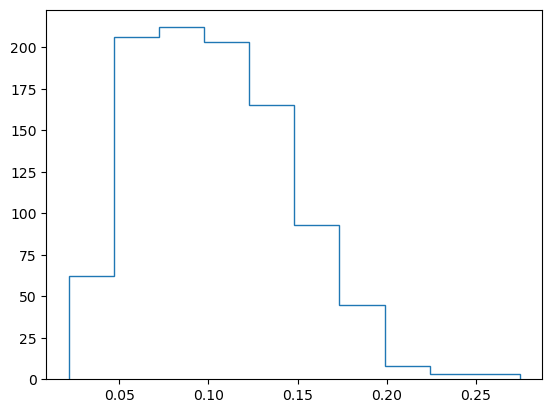

In [126]:
counts, bins = np.histogram(zcr_df['zero_crossing_rate_mean'])
plt.stairs(counts, bins)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

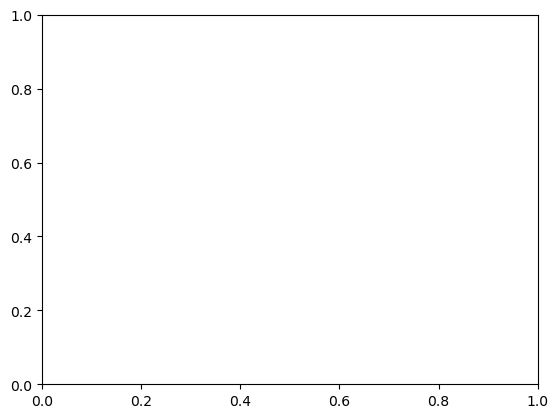

In [125]:
colors = {'blues':red, 'classical':yellow, 'country':green, 'disco':purple, 'hiphop':orange, 'jazz':cian, 'metal':blue, 'pop':pink, 'reggae': crimson, 'rock':}
plt.scatter(zcr_df['zero_crossing_rate_mean'], zcr_df['tempo'], c=zcr_df['label'].map(colors))
